In [1]:
from model import LSTMModel
import torch
import sklearn.metrics as metrics

In [6]:
def get_metrics(model_name,model,dataloader):
    model.eval()
    total_correct=0
    total=0
    tp=[0]*6
    fp=[0]*6
    fn=[0]*6
    tn=[0]*6
    dict=[]
    for i in range(6):
        dict.append([0]*6)
    for i,(x,y) in enumerate(dataloader):
        y_pred=model(x)
        y_pred=torch.argmax(y_pred,dim=1)
        y=torch.argmax(y,dim=1)
        total_correct+=torch.sum(y_pred==y).item()
        total+=len(y)
        for i in range(6):
            tp[i]+=torch.sum((y_pred==i)&(y==i)).item()
            fp[i]+=torch.sum((y_pred==i)&(y!=i)).item()
            fn[i]+=torch.sum((y_pred!=i)&(y==i)).item()
            tn[i]+=torch.sum((y_pred!=i)&(y!=i)).item()
        for j in range(len(y)):
            dict[y_pred[j]][y[j]]+=1
    acc=total_correct/total
    accuracy_per_class=[0]*6
    precision=[0]*6
    recall=[0]*6
    f1=[0]*6
    for i in range(6):
        accuracy_per_class[i]=tp[i]/(tp[i]+fn[i])
        if tp[i]+fp[i]!=0:
            precision[i]=tp[i]/(tp[i]+fp[i])
        if tp[i]+fn[i]!=0:
            recall[i]=tp[i]/(tp[i]+fn[i])
        if precision[i]+recall[i]!=0:
            f1[i]=2*precision[i]*recall[i]/(precision[i]+recall[i])

    print('Accuracy:',acc)
    fpr=[fp[i]/(fp[i]+tn[i]) for i in range(6)]
    fnr=[fn[i]/(fn[i]+tp[i]) for i in range(6)]
    print('Classes:',['negative','learning','recall','recognition_familiar'])
    for i in range(6):
        print(accuracy_per_class[i],f1[i],recall[i],precision[i],fpr[i],fp[i],fnr[i],fn[i])
    print('Confusion matrix:')
    print(dict)




In [ ]:
for x in ['model2.5/2_16/model53.pt','model2.5/2_32/model23.pt','model2.5/2_64/model30.pt','model2.5/3_16/model63.pt','model2.5/3_32/model29.pt','model2.5/3_64/model26.pt','model2.5/4_10/model29.pt','model2.5/4_16/model51.pt','model2.5/4_32/model48.pt','model2.5/4_64/model64.pt']:
    print(x)
    second=x.split('/')[0]
    second=second[5:]
    val_dataloader=torch.load('val'+second+'_dataloader.pt')
    test_dataloader=torch.load('test'+second+'_dataloader.pt')
    model=torch.load(x)
    get_metrics(x,model,val_dataloader)
    get_metrics(x,model,test_dataloader)

In [ ]:
for x in ['model3/2_16/model45.pt','model3/2_32/model20.pt','model3/2_64/model25.pt','model3/3_16/model39.pt','model3/3_32/model29.pt','model3/3_64/model26.pt','model3/4_10/model30.pt','model3/4_16/model45.pt','model3/4_32/model37.pt','model3/4_64/model66.pt']:
    print(x)
    second=x.split('/')[0]
    second=second[5:]
    val_dataloader=torch.load('val'+second+'_dataloader.pt')
    test_dataloader=torch.load('test'+second+'_dataloader.pt')
    model=torch.load(x)
    get_metrics(x,model,val_dataloader)
    get_metrics(x,model,test_dataloader)

In [8]:
for x in ['model3/3_32/model34.pt']:
    print(x)
    second=x.split('/')[0]
    second=second[5:]
    val_dataloader=torch.load('val'+second+'_dataloader.pt')
    test_dataloader=torch.load('test'+second+'_dataloader.pt')
    model=torch.load(x)
    get_metrics(x,model,val_dataloader)
    get_metrics(x,model,test_dataloader)

model3/3_32/model34.pt
Accuracy: 0.7445339470655926
Classes: ['negative', 'learning', 'recall', 'recognition_familiar']
0.9087635054021609 0.9386236825790453 0.9087635054021609 0.9705128205128205 0.02541436464088398 23 0.09123649459783914 76
0.9287671232876712 0.8681177976952624 0.9287671232876712 0.8149038461538461 0.056081573197378005 77 0.07123287671232877 26
0.1949685534591195 0.23308270676691728 0.1949685534591195 0.2897196261682243 0.048131728942368585 76 0.8050314465408805 128
0.2072072072072072 0.21800947867298578 0.2072072072072072 0.23 0.04732636754763368 77 0.7927927927927928 88
0.5925925925925926 0.5043782837127846 0.5925925925925926 0.43902439024390244 0.12307692307692308 184 0.4074074074074074 99
0.0 0 0.0 0.0 0.004091174751607247 7 1.0 27
Confusion matrix:
[[757, 12, 4, 6, 1, 0], [57, 339, 10, 3, 7, 0], [3, 2, 31, 15, 52, 4], [10, 5, 21, 23, 37, 4], [5, 7, 91, 62, 144, 19], [1, 0, 2, 2, 2, 0]]
Accuracy: 0.7704517704517705
Classes: ['negative', 'learning', 'recall', 'reco

Text(0, 0.5, 'Predicted label')

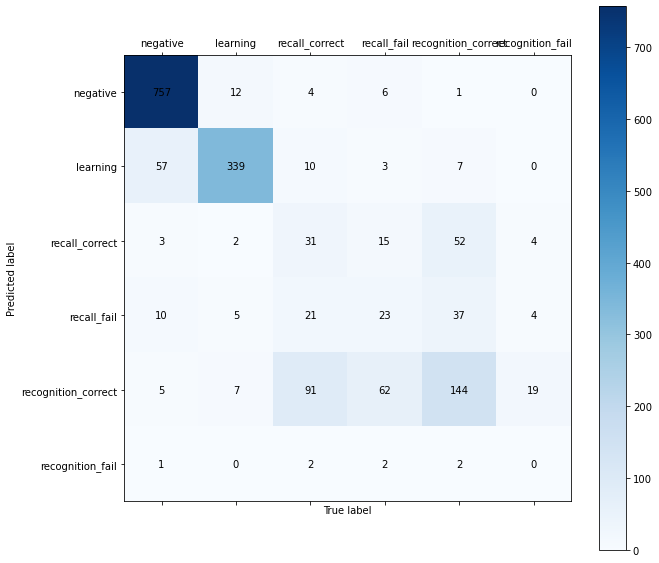

In [15]:
arr=[[757, 12, 4, 6, 1, 0], [57, 339, 10, 3, 7, 0], [3, 2, 31, 15, 52, 4], [10, 5, 21, 23, 37, 4], [5, 7, 91, 62, 144, 19], [1, 0, 2, 2, 2, 0]]
#Plot confusion matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
#Show values
for i in range(6):
    for j in range(6):
        ax.text(j, i, arr[i][j], ha='center', va='center', color='black')
cax = ax.matshow(arr, cmap='Blues')
fig.colorbar(cax)
#Make bigger plot
fig.set_size_inches(10, 10)
plt.xticks(np.arange(6),['negative','learning','recall_correct','recall_fail','recognition_correct','recognition_fail'])
plt.yticks(np.arange(6),['negative','learning','recall_correct','recall_fail','recognition_correct','recognition_fail'])
plt.xlabel('True label')
plt.ylabel('Predicted label')



In [ ]:
for x in ['model3.5/2_16/model43.pt','model3.5/2_32/model39.pt','model3.5/2_64/model31.pt','model3.5/3_16/model27.pt','model3.5/3_32/model29.pt','model3.5/3_64/model29.pt','model3.5/4_10/model56.pt','model3.5/4_16/model50.pt','model3.5/4_32/model23.pt','model3.5/4_64/model68.pt']:
    print(x)
    second=x.split('/')[0]
    second=second[5:]
    val_dataloader=torch.load('val'+second+'_dataloader.pt')
    test_dataloader=torch.load('test'+second+'_dataloader.pt')
    model=torch.load(x)
    get_metrics(x,model,val_dataloader)
    get_metrics(x,model,test_dataloader)